<a href="https://colab.research.google.com/github/giovannalinodev/machine_learning/blob/main/atividade1_giovanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade Prática: Análise Estatística dos Dados do Titanic com Pandas e Numpy

### *Objetivo:* Aplicar conceitos básicos de estatística para realizar uma análise exploratória dos dados do Titanic utilizando Python, pandas e numpy.


1- Importação e Visualização Inicial


1.1 - Importar as Bibliotecas Necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1.2. Carregar o Dataset:

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

1.3. Visualizar as Primeiras Linhas do Dataset:

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1.4. Obter Informações Gerais sobre o Dataset:

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

**Perguntas:**





1.   Quantas linhas e colunas o dataset possui?

     **O dataset possui 891 linhas e 12 colunas.**

2.   Quais são os tipos de dados de cada coluna?

      Lista dos tipos de dados das 12 colunas:
        * PassengerId: int64 (inteiro)
        * Survived: int64 (inteiro)
        * Pclass: int64 (inteiro)
        * Name: object (texto/string)
        * Sex: object (texto/string)
        * Age: float64 (flutuante)
        * SibSp: int64 (inteiro)
        * Parch: int64 (inteiro)
        * Ticket: object (texto/string)
        * Fare: float64 (flutuante)
        * Cabin: object (texto/string)
        * Embarked: object (texto/string)


3.   Existem valores ausentes? Quais colunas têm valores ausentes?

  *  Sim, há valores ausentes no dataset nas colunas a seguir: Embarked: 2 valores ausentes (889 valores não nulos de 891), Cabin: 687 valores ausentes (204 valores não nulos de 891) e Age: 177 valores ausentes (714 valores não nulos de 891).







2. Limpeza de Dados

2.1. Identificar Valores Ausentes:

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


2.2. Tratar Valores Ausentes na Coluna 'Age':

*texto em itálico*
Opção 1: Preencher com a média.


In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-6-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


*Opção* 2: Preencher com a mediana.


In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-7-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


2.3. Tratar Valores Ausentes na Coluna 'Embarked':

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-8-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


2.4. Remover a Coluna 'Cabin' por Possuir Muitos Valores Ausentes:

In [9]:
df.drop('Cabin', axis=1, inplace=True)

2.5. Confirmar a Limpeza de Dados:

In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Perguntas:**



1.   Quantos valores ausentes foram preenchidos ou removidos em cada coluna?

    * Coluna 'Embarked'

      * Antes: 2 valores ausentes.
      * Após o preenchimento com a moda (valor mais frequente), os valores ausentes na coluna Embarked foram preenchidos. 2 valores ausentes foram preenchidos.

    * Coluna 'Age'
      * Antes: 177 valores ausentes.
      * Após o preenchimento com a média (ou mediana), todos os valores ausentes na coluna Age foram preenchidos. 177 valores ausentes foram preenchidos.

    * Coluna 'Cabin'
      * Antes: 687 valores ausentes.
      * A coluna Cabin foi removida, pois possui uma quantidade muito alta de valores ausentes (687 de 891). Portanto, 687 valores ausentes foram removidos ao excluir a coluna inteira.

2.   Por que decidimos remover a coluna 'Cabin'?
    * Com a quantidade elevada de valres ausentes na coluna Cabin (687 valores ausentes) poderia dificultar a análise e a qualidade do modelo preditivo com a falta de informações úteis dessa coluna.







3. Análise de Medidas Descritivas

3.1. Calcular Média, Mediana e Desvio Padrão da Idade:

In [ ]:
mean_age = np.mean(df['Age'])
median_age = np.median(df['Age'])
std_age = np.std(df['Age'])
print(f"Média da idade: {mean_age:.2f}")
print(f"Mediana da idade: {median_age}")
print(f"Desvio padrão da idade: {std_age:.2f}")

3.2. Calcular a Média da Tarifa ('Fare') por Classe:

In [ ]:
fare_mean = df.groupby('Pclass')['Fare'].mean()
print(fare_mean)

Perguntas:



*   Como a média e a mediana da idade se comparam?
*   Existe uma grande variação na tarifa paga pelos passageiros? Por quê?





4. Agrupamento e Análise de Sobrevivência

4.1. Calcular a Taxa de Sobrevivência Geral:

In [11]:
survival_rate = df['Survived'].mean()
print(f"Taxa de sobrevivência geral: {survival_rate:.2f}")


Taxa de sobrevivência geral: 0.38


4.2. Taxa de Sobrevivência por Sexo:

In [12]:
survival_sex = df.groupby('Sex')['Survived'].mean()
print(survival_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


*4.3*. Taxa de Sobrevivência por Classe:

In [13]:
survival_class = df.groupby('Pclass')['Survived'].mean()
print(survival_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


4.4. Analisar a Relação entre Idade e Sobrevivência:

Criar uma Coluna de Faixa Etária:

In [15]:
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')
survival_agegroup = df.groupby('AgeGroup')['Survived'].mean()
print(survival_agegroup)

AgeGroup
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


**Perguntas:**



*   Qual grupo de sexo teve maior taxa de sobrevivência?

       * O grupo do sexo feminino teve uma taxa maior de sobrevivência em comparação ao masculino: Mulheres (female): Taxa de sobrevivência de 74.2% (0.742)
Homens (male): Taxa de sobrevivência de 18.9% (0.189).


*   Como a classe do bilhete influencia a taxa de sobrevivência?
      * A classe do bilhete (denotada pela coluna Pclass) denota que os passageiros da 1ª classe tiveram uma taxa de sobrevivência significativamente maior do que os da 3ª classe. Isso sugere que a classe do bilhete estava associada à prioridade no resgate e/ou melhores condições para sobreviver. A taxa de sobrevivência é maior nas classes superiores (1ª classe) e menor na classe inferior (3ª classe). A análise das taxas de sobrevivência por classe mostra que:

          * 1ª Classe (Pclass = 1): Taxa de sobrevivência de 62.96% (0.6296)
          * 2ª Classe (Pclass = 2): Taxa de sobrevivência de 47.28% (0.4728)
          * 3ª Classe (Pclass = 3): Taxa de sobrevivência de 24.24% (0.2424)

*   Existe uma diferença significativa na sobrevivência entre crianças e adultos?

    * Sim, há uma diferença significativa na taxa de sobrevivência entre crianças e adultos. As crianças tiveram uma taxa de sobrevivência significativamente maior do que os adultos. A criação da coluna de faixa etária (AgeGroup) divide os passageiros em "Child" (menores de 18 anos) e "Adult" (maiores de 18 anos).
        1. Adultos: Taxa de sobrevivência de 36.12% (0.3612)
        2. Crianças: Taxa de sobrevivência de 53.98% (0.5398)





5. Visualização de Dados

5.1. Gráfico de Barras da Taxa de Sobrevivência por Sexo:


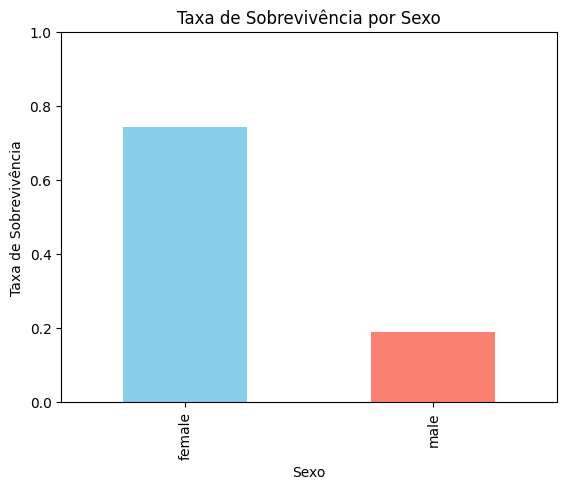

In [16]:
survival_sex.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.ylim(0, 1)
plt.show()


5.2. Gráfico de Barras da Taxa de Sobrevivência por Classe

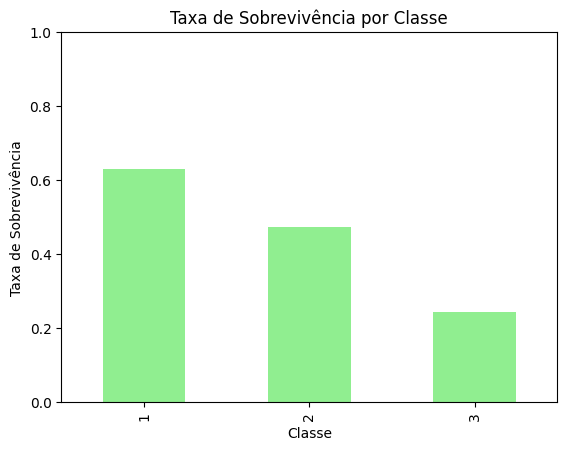

In [17]:
survival_class.plot(kind='bar', color='lightgreen')
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.ylim(0, 1)
plt.show()

5.3. Histograma da Distribuição de Idades:

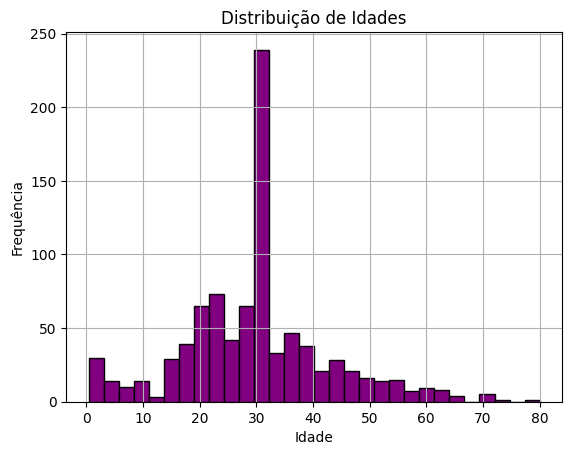

In [19]:
df['Age'].hist(bins=30, color='purple', edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

5.4. Gráfico de Dispersão entre Tarifa e Idade Colorido por Sobrevivência:

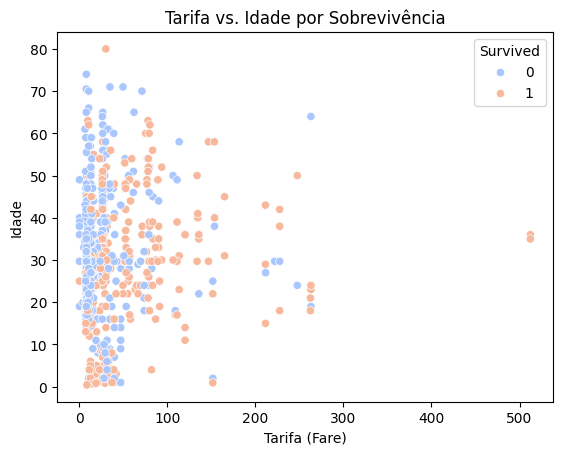

In [18]:
sns.scatterplot(data=df, x='Fare', y='Age', hue='Survived', palette='coolwarm')
plt.title('Tarifa vs. Idade por Sobrevivência')
plt.xlabel('Tarifa (Fare)')
plt.ylabel('Idade')
plt.show()


Perguntas:



*   O que os gráficos revelam sobre a relação entre sexo, classe e sobrevivência?
      *  Gráfico de barras da Taxa de Sobrevivência por Sexo:
          * O gráfico de barras mostra claramente que a taxa de sobrevivência das mulheres foi significativamente mais alta do que a dos homens. Este dado reforça a hipótese de que mulheres, crianças e outros grupos vulneráveis tiveram prioridade durante o resgate.

      * Gráfico de barras da Taxa de Sobrevivência por Classe:
          * O gráfico de barras sobre a taxa de sobrevivência por classe (Pclass) mostra uma grande diferença entre as classes, a taxa de sobrevivência decresce à medida que a classe do passageiro diminui.


*   Há alguma tendência visível na relação entre tarifa e idade em relação à sobrevivência?

      * Sim, com o Gráfico de dispersão entre tarifa e idade, colorido por sobrevivência conseguimos identificar algumas tendências interessantes:
          * Sobreviventes (marcados com cores quentes) tendem a ter uma maior tarifa em comparação aos não sobreviventes (marcados com cores mais frias). Isso sugere que passageiros que pagaram tarifas mais altas (possivelmente associados à 1ª classe) tinham uma maior probabilidade de sobreviver.
          * Idade: Não há uma tendência clara de que a idade tenha uma relação forte com a sobrevivência diretamente no gráfico de dispersão. No entanto, você pode notar que muitas das crianças (mais jovens) sobreviveram, enquanto uma quantidade considerável de adultos não sobreviveu, o que é consistente com a análise anterior.

    




Desafio Extra (Opcional): Analisar a Relação entre 'SibSp' e Sobrevivência


*   Analisar a Relação entre Número de Irmãos/Cônjuges a Bordo ('SibSp') e Sobrevivência:

In [20]:
# Calcular a taxa de sobrevivência por número de irmãos/cônjuges a bordo
survival_sibsp = df.groupby('SibSp')['Survived'].mean()
print(survival_sibsp)


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


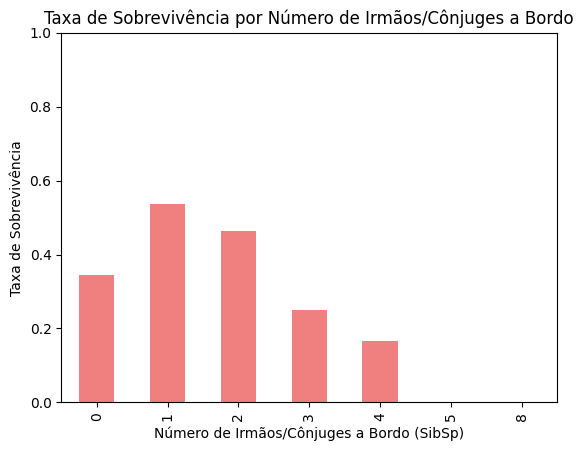

In [21]:
# Visualização da taxa de sobrevivência por número de irmãos/cônjuges a bordo
survival_sibsp.plot(kind='bar', color='lightcoral')
plt.title('Taxa de Sobrevivência por Número de Irmãos/Cônjuges a Bordo')
plt.xlabel('Número de Irmãos/Cônjuges a Bordo (SibSp)')
plt.ylabel('Taxa de Sobrevivência')
plt.ylim(0, 1)
plt.show()


* O gráfico mostra uma taxa de sobrevivência mais alta para os passageiros que tinham 1 ou 2 familiares a bordo e uma taxa de sobrevivência mais baixa para aqueles que não tinham familiares (SibSp = 0) ou aqueles com muitos familiares a bordo.

* Interpretação:
Passageiros com SibSp = 0 (sem familiares a bordo): Esses passageiros podem ter sido mais vulneráveis, pois estavam sozinhos e poderiam ter sido mais facilmente negligenciados durante o resgate. Isso pode explicar uma taxa de sobrevivência mais baixa para esses passageiros.

* Passageiros com SibSp = 1 ou 2 (um ou dois familiares a bordo): Esses passageiros podem ter tido uma chance de sobrevivência maior, provavelmente devido a fatores como ajuda mútua entre familiares e mais atenção durante o processo de evacuação.

* Passageiros com SibSp > 2: A taxa de sobrevivência pode ser mais baixa, pois, com mais familiares a bordo, pode ter sido mais difícil obter ajuda rápida, ou o resgate pode ter sido mais caótico para grupos maiores.